# Topic Modelling with Gensim and Spacy LDA

In [9]:
import pandas as pd
import os
import gensim
import spacy
import pyLDAvis
import re

In [13]:
df = pd.read_csv('data_features', index_col = 0)

In [20]:
df['Processed'] = df.Text.astype(str).apply(lambda x: re.sub('[,.!?]', '', x.lower()))

An Unlikely Parasite: The Mistletoe                           during the holidays many people hang mistletoe...
The Song of Wandering Aengus                                  i went out to the hazel woodbecause a fire was...
Thanksgiving: Fact or Fiction                                 this article is provided courtesy of historyco...
Native American Conflicts                                     jamestown logo for world's fair in 1907prior t...
A Monument for Peace                                          in december 1864 the civil war was nearly over...
Name: Processed, dtype: object

In [23]:
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.Processed.values.tolist()
data_words = list(sent_to_words(data))

In [24]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [27]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
                                            
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['holiday', 'many', 'people', 'hang', 'people', 'share', 'kiss', 'evergreen', 'popular', 'tradition', 'let', 'image', 'romantic', 'plant', 'use', 'happy', 'holiday', 'fool', 'forest', 'mistletoe', 'real', 'damage', 'let', 'take', 'look', 'mistletoe', 'plant', 'mean', 'leave', 'remain', 'green', 'year', 'also', 'poisonous', 'white', 'berry', 'small', 'yellow', 'flower', 'mistletoe', 'life', 'plant', 'take', 'water', 'nutrient', 'plants', 'reason', 'mistletoe', 'consider', 'white', 'berry', 'mistletoe', 'contain', 'seed', 'bird', 'mammal', 'feed', 'berry', 'seed', 'may', 'attach', 'animal', 'eat', 'berry', 'animal', 'may', 'carry', 'seed', 'part', 'tree', 'shrub', 'may', 'also', 'carry', 'seed', 'plant', 'altogether', 'seed', 'start', 'grow', 'root', 'dig', 'tree', 'shrub', 'root', 'grow', 'tissue', 'plant', 'take', 'mistletoe', 'take', 'nutrient', 'water', 'away', 'host', 'plant', 'mistletoe', 'hard', 'remove', 'infect', 'plant', 'good', 'way', 'fight', 'mistletoe', 'infestation', 'cut

In [28]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 4), (3, 1), (4, 1), (5, 1), (6, 4), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 10), (52, 1), (53, 1), (54, 2), (55, 2), (56, 2), (57, 9), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 5), (68, 1), (69, 2), (70, 1), (71, 1), (72, 2), (73, 1), (74, 5), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 2), (81, 1), (82, 1), (83, 2), (84, 2), (85, 1), (86, 1), (87, 1)]]


In [29]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [30]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"people" + 0.010*"many" + 0.008*"make" + 0.007*"year" + '
  '0.007*"country" + 0.007*"also" + 0.006*"become" + 0.006*"would" + '
  '0.006*"man" + 0.006*"work"'),
 (1,
  '0.017*"scientist" + 0.008*"year" + 0.008*"may" + 0.007*"earth" + '
  '0.007*"find" + 0.006*"human" + 0.006*"make" + 0.006*"time" + 0.005*"study" '
  '+ 0.005*"also"'),
 (2,
  '0.011*"people" + 0.011*"make" + 0.006*"may" + 0.006*"say" + 0.006*"light" + '
  '0.006*"also" + 0.006*"work" + 0.006*"take" + 0.005*"car" + 0.005*"energy"'),
 (3,
  '0.016*"say" + 0.009*"school" + 0.007*"go" + 0.007*"time" + 0.007*"get" + '
  '0.007*"play" + 0.007*"make" + 0.007*"student" + 0.007*"day" + '
  '0.006*"people"'),
 (4,
  '0.024*"people" + 0.018*"water" + 0.011*"place" + 0.011*"city" + '
  '0.009*"live" + 0.009*"also" + 0.009*"many" + 0.008*"build" + 0.007*"call" + '
  '0.007*"area"'),
 (5,
  '0.024*"say" + 0.010*"school" + 0.008*"make" + 0.008*"go" + 0.008*"see" + '
  '0.007*"time" + 0.006*"know" + 0.006*"want" + 0.006*

In [41]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.35295735278688334


In [42]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=18, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 30
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        
        # iterate through number of topics
        for k in topics_range:
            
            # iterate through alpha values
            for a in alpha:
                
                # iterare through beta values
                for b in beta:
                    
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


In [44]:
optimization = pd.read_csv('lda_tuning_results.csv')

In [45]:
optimization  

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.345549
1,75% Corpus,2,0.01,0.31,0.365048
2,75% Corpus,2,0.01,0.61,0.368488
3,75% Corpus,2,0.01,0.9099999999999999,0.332261
4,75% Corpus,2,0.01,symmetric,0.332579
...,...,...,...,...,...
1675,100% Corpus,29,asymmetric,0.01,0.351378
1676,100% Corpus,29,asymmetric,0.31,0.402414
1677,100% Corpus,29,asymmetric,0.61,0.433983
1678,100% Corpus,29,asymmetric,0.9099999999999999,0.366103


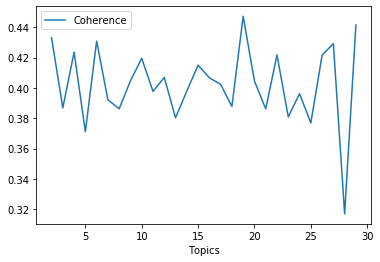

In [55]:
optimization.loc[(optimization['Alpha'] == '0.01') & (optimization['Beta'] == '0.61') & (optimization['Validation_Set'] == '100% Corpus')].plot.line(x='Topics', y='Coherence')

Fixing Alpha at 0.01 and Beta at 0.61, the maximum coherence(C_v) score occurs at 19 topics. We will retrain our model with 19 topics.

In [85]:
from gensim.models.wrappers import LdaMallet
import os
os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = 'C:/new_mallet/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=19, id2word=id2word)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(1,
  [('water', 0.10406025898983645),
   ('cold', 0.019450033534540577),
   ('ice', 0.0191920755301037),
   ('warm', 0.01846979311768044),
   ('air', 0.017386369499045557),
   ('wind', 0.016354537481298045),
   ('place', 0.015064747459113657),
   ('ocean', 0.0145488314502399),
   ('temperature', 0.013671774235154517),
   ('hot', 0.013207449827168137)]),
 (17,
  [('state', 0.026914868389850605),
   ('law', 0.018694174373567306),
   ('government', 0.01742945221721603),
   ('vote', 0.0090901904987748),
   ('public', 0.008734487392301003),
   ('pass', 0.00758833293810766),
   ('people', 0.007548810370721682),
   ('citizen', 0.007035016994703976),
   ('group', 0.007035016994703976),
   ('power', 0.006639791320844202)]),
 (18,
  [('earth', 0.03085571012617276),
   ('energy', 0.0205030734390165),
   ('space', 0.017106114526043353),
   ('rock', 0.015164995147201554),
   ('scientist', 0.01504367518602394),
   ('year', 0.013345195729537367),
   ('planet', 0.013223875768359754),
   ('light', 0.

In [84]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(model, corpus, id2word)
LDAvis_prepared

C:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.239577  0.132809       1        1  8.418695
16     0.175128  0.069764       2        1  6.012086
9      0.181085  0.124734       3        1  5.994120
10     0.005743  0.247508       4        1  5.748884
7      0.085573  0.075560       5        1  5.665035
4      0.053491 -0.179851       6        1  5.531908
0      0.051402  0.091565       7        1  5.443829
11    -0.223678 -0.005862       8        1  5.270625
3      0.081560  0.147221       9        1  5.260540
17     0.094388 -0.004792      10        1  5.162298
8     -0.184857 -0.042453      11        1  4.997417
1      0.184852 -0.203024      12        1  4.932230
2     -0.183815 -0.080462      13        1  4.924040
18     0.190418 -0.077847      14        1  4.902537
5     -0.065402 -0.036695      15        1  4.793356
13    -0.047778 -0.110527      16        1  4.340263
6     -0.034911 -0.259880      17        1  4.268939
14    -0.044183  0.086520      18        1  4.218887
15    -0.079440  0.025713      19        1  4.114312, topic_info=        Term         Freq        Total Category  logprob  loglift
56    people  5803.000000  5803.000000  Default  30.0000  30.0000
45      make  5562.000000  5562.000000  Default  29.0000  29.0000
80     water  2352.000000  2352.000000  Default  28.0000  28.0000
356   school  1768.000000  1768.000000  Default  27.0000  27.0000
328     play  1626.000000  1626.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
55      part   177.868324  1312.367191  Topic19  -4.7430   1.1922
1071    word   138.762522   569.564395  Topic19  -4.9913   1.7786
72     start   146.331387  1341.612487  Topic19  -4.9382   0.9749
266     kind   136.239567   699.444318  Topic19  -5.0096   1.5548
123     time   134.978090  3327.358222  Topic19  -5.0189  -0.0141

[1751 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
11568      6  0.863678  abbreviate
14264      4  0.816393     abilene
416        2  0.996039      access
129        2  0.989584        acid
1593       3  0.625556         act
...      ...       ...         ...
636        8  0.073420       young
636        9  0.278059       young
636       17  0.060923       young
7005       6  1.005007        zone
6404      12  0.983146         zoo

[2785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 17, 10, 11, 8, 5, 1, 12, 4, 18, 9, 2, 3, 19, 6, 14, 7, 15, 16])

In [89]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                
            else:
                break
                
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [90]:
# Show
df_dominant_topic.index = df.index

In [94]:
df_topic_models = df_dominant_topic[['Dominant_Topic']]
df_topic_models.to_csv('data_topics')